In [1]:
import warnings
warnings.filterwarnings('ignore')  #To ignore all warnings
#importing data set
import pandas as pd
lcn = pd.read_csv(r"LungCapData.csv")

In [2]:
#Read 5 records
lcn.head(5)

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no


In [3]:
#Data Types of values in columns
lcn.dtypes

LungCap      float64
Age            int64
Height       float64
Smoke         object
Gender        object
Caesarean     object
dtype: object

In [4]:
#Label Encoder to conver all object type data to Numeric data
import numpy as np
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in lcn.columns:
    if lcn[column].dtype == "object":
        lcn[column] = LabelEncoder().fit_transform(lcn[column])
    else:
        pass

In [5]:
#Check if data is converted to numeric or not
lcn.head(5)

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,0,1,0
1,10.125,18,74.7,1,0,0
2,9.550,16,69.7,0,0,1
3,11.125,14,71.0,0,1,0
4,4.800,5,56.9,0,1,0


In [6]:
#Train Test Split
from sklearn.model_selection import train_test_split
lcn_train, lcn_test = train_test_split(lcn,test_size=0.2)

In [7]:
# dependent Y variables and X Independent variables
lcn_train_x = lcn_train.iloc[:,1:]
lcn_train_y = lcn_train.iloc[:,0]
lcn_test_x = lcn_test.iloc[:,1:]
lcn_test_y = lcn_test.iloc[:,0]

In [8]:
print(lcn_train_x.shape)
print(lcn_train_y.shape)
print("-----------")
print(lcn_test_x.shape)
print(lcn_test_y.shape)

(580, 5)
(580,)
-----------
(145, 5)
(145,)


In [9]:
#Linear Regression Model on train Data
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(lcn_train_x,lcn_train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [10]:
#predict Y values of test data based on Linear Regression model 
reg.predict(lcn_test_x)

array([ 3.33851253,  7.43711271, 10.4423577 ,  8.29099797,  6.59268962,
        9.44457103, 11.72388776,  7.77487401,  7.7524917 ,  6.03239858,
        9.78766344,  6.29803647,  4.52039584,  9.79978177, 12.40404214,
        9.08904964,  7.09316565, 10.40936672, 11.80029755,  7.67623724,
        1.12427417, 10.13029944,  5.71948567,  7.30493139, 10.38693158,
        7.57131293,  8.22425463,  3.86916806, 10.26173712,  9.4407939 ,
        7.88679441,  4.21195939,  2.66128063,  8.15972025, 10.14302951,
        5.95528947,  6.04914869,  4.43926667,  5.84845727,  8.01932965,
       12.46857652,  9.58394703,  6.19074786, 12.40042034,  5.04718665,
        9.43214205,  8.01083314,  5.54887124,  7.43711271, 10.29724773,
        8.97859563, 11.09851835,  7.42328508,  8.08261113, 10.49909489,
        9.48772351,  8.71829736, 10.82720394,  6.70399828,  6.5243781 ,
        7.60738173,  5.74116866,  6.96596153,  6.10950769,  9.11520909,
        9.92019868,  9.13683391,  7.53097194,  8.21112632,  2.63

In [11]:
#Coefficent
reg.coef_

array([ 0.1754448 ,  0.25703037, -0.62793798,  0.49213485, -0.30481464])

In [12]:
#Intercept
reg.intercept_

-11.045536168613403

In [13]:
#RSquare
RSquare = reg.score(lcn_train_x,lcn_train_y)
RSquare

0.8461167423533625

In [14]:
#pred_train = reg.predict(lcn_train_x)
#error_train = lcn_train_y - pred_train
#N = lcn_train_x.shape[0]
#K = lcn_train_x.shape[1]
#Adj_RSquare = 1 - (1-RSquare)*(N-1)/(N-K-1)
#Adj_RSquare

In [15]:
#finding  MSE, RMSE, MAPE (on the test data)

In [16]:
pred_test =reg.predict(lcn_test_x)
error_test = lcn_test_y - pred_test

In [17]:
MSE = np.mean(np.square(error_test))
MAE = np.mean(np.abs(error_test))
MAPE = np.mean(np.abs(error_test * 100/lcn_test_y))
RMSE = np.sqrt(MSE)

In [18]:
print("MSE is : ",MSE,", MAE is : ",MAE,", MAPE is : ",MAPE,", RMSE is : ",RMSE)

MSE is :  0.8193634981327333 , MAE is :  0.7219199924144476 , MAPE is :  12.273674055443044 , RMSE is :  0.9051869962238374


In [19]:
#Check assumption of Linear Regression
#mean of the error terms should be close to zero
pred_train = reg.predict(lcn_train_x)
error_train = lcn_train_y - pred_train
np.mean(error_train)

-3.137719968906132e-15

In [20]:
import matplotlib.pyplot as plt
plt.hist(error_train,bins=20)
plt.show()

<Figure size 640x480 with 1 Axes>

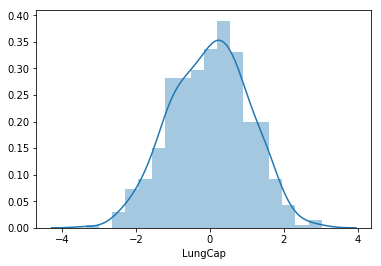

In [21]:
import seaborn as sns
sns.distplot(error_train)

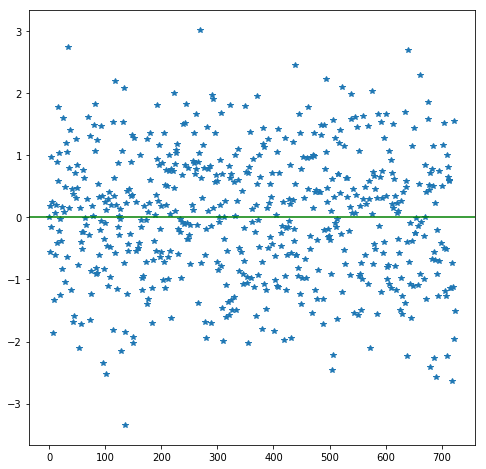

In [22]:
#scatter plot of error
plt.figure(figsize=(8,8))
plt.plot(error_train,"*")
plt.axhline(y = np.mean(error_train),color="green")

In [23]:
pred_actual = pd.DataFrame({"Predicted":pred_train,"Actual":lcn_train_y})
pred_actual.head(10)

,Predicted,Actual
663,5.616674,5.550
116,3.111205,3.750
94,11.403532,11.750
46,6.930451,7.650
58,5.132792,4.625
168,6.987188,6.050
214,6.246276,7.250
348,4.134151,3.425
600,10.126979,11.800
558,11.565193,10.575


<Figure size 720x720 with 0 Axes>

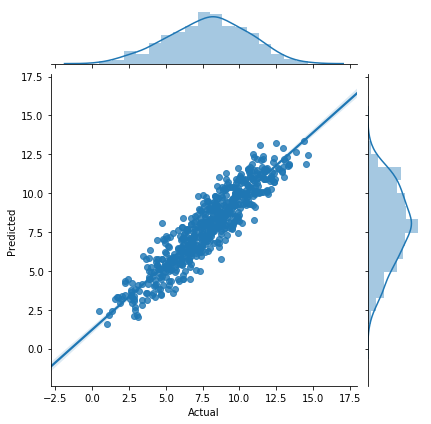

In [24]:
plt.figure(figsize=(10,10))
sns.jointplot(x="Actual",y="Predicted",kind="reg",data=pred_actual)